In [3]:
from pathlib import Path

import pandas as pd

import numpy as np

import json

In [4]:
v = {}
tm = {}

In [5]:
with open('phosphors.json') as f:
    js = json.load(f)

In [6]:
def agg(phosphors):
    """agg:
    [
        {
            'formula': 'BaSrMgP2O8',
            'lambdas': [460.0, 470.0],
            'stoichiometry': {'Ba': 1, 'Mg': 1, 'O': 8, 'P': 2, 'Sr': 1},
            'std': 5.0,
            'avg': 465.0,
    """
    # aggregate same-stoichiometry phosphors onto their friends
    agg = []
    for j in phosphors:
        if j['stoichiometry'] not in [p['stoichiometry'] for p in agg]:
            agg.append({
                'formula': j['formula'],
                'lambdas': [j['lambda']],
                'stoichiometry': j['stoichiometry'],
            })
            for j_ in phosphors:
                if j['stoichiometry'] == j_['stoichiometry'] and j['lambda'] != j_['lambda']:
                    agg[-1]['lambdas'].append(j_['lambda'])
    # calculate standard deviation of lambda
    for j in agg:
        j['std'] = np.std(j['lambdas'])
        j['avg'] = np.mean(j['lambdas'])
    return agg

In [7]:
def accept(phosphors, threshold=30):
    accept = [j for j in phosphors if j['std'] < threshold]

    for j in accept:
        j['lambda'] = j['avg']
        del j['lambdas']
        del j['std']
        del j['avg']

    return accept

<Axes: >

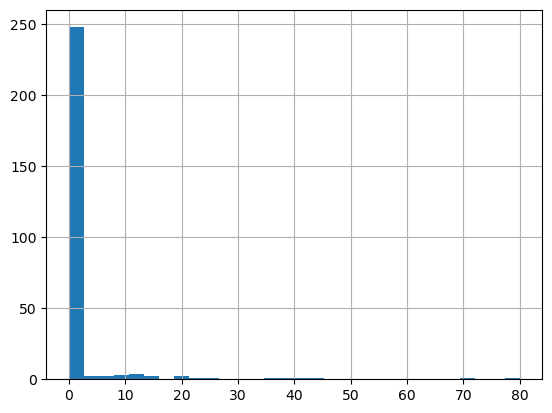

In [9]:
pd.DataFrame(
    agg(js)
)['std'].hist(bins=30)

In [10]:
js2 = accept(agg(js))

with open('phosphors2.json', 'w') as f:
    json.dump(js2, f)